# Degradation

Les composés organiques se dégardent avec le temps (chaleur, UVs, etc). On a leur "demie-vie" comme donnée d'entrée (même chose que pour les éléments radioactifs).

Pour replésenter cette décroissance, on applique un facteur constant à chaque pas de simulation.

Ce notebook sert simplement à vérifier que le calcul de ce facteur donne bien la demie-vie qu'on attend.

In [1]:
# To make sure that you run an up-to-date version of your package:
# always do "Kernel > Restart and Run All"
LOG="/tmp/log_install"
!(cd ..; pip install . > $LOG 2>&1 || (echo "ERROR: INSTALL FAILED ! "; cat $LOG); cd - > /dev/null;)
from suntox import degradation as sd

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [3]:
HALF_LIFE_DAYS = 3.57
SIM_PERIOD_MIN = 30
PLOT_LENGTH_DAYS = 10

In [4]:
f = sd.compute_degradation_factor(HALF_LIFE_DAYS, SIM_PERIOD_MIN)

In [5]:
N = HALF_LIFE_DAYS*24*60/SIM_PERIOD_MIN
print(f"{f}, f**{N} = {f**N}")

0.995963193354342, f**171.35999999999999 = 0.5000000000000043


In [6]:
x = np.arange(0, PLOT_LENGTH_DAYS*24, 0.5)
c0 = 1
c = [c0]
for i in range(1, len(x)):
    c.append(c[i-1] * f)

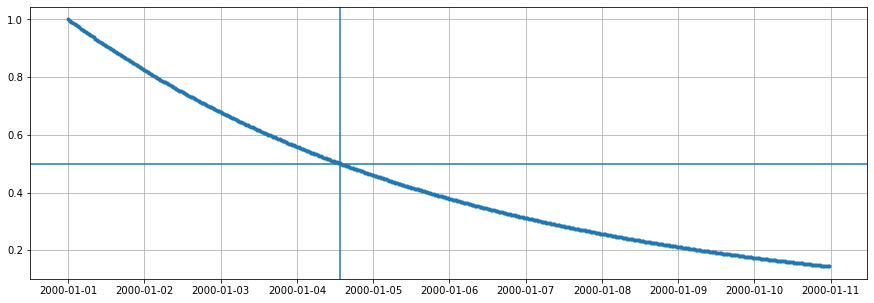

In [7]:
t0 = datetime.strptime("01/01/2000", "%d/%m/%Y")
t = [ t0 + timedelta(minutes=SIM_PERIOD_MIN*i) for i in range(len(x)) ]
plt.figure(figsize=(15,5))
plt.grid(True)
plt.axvline(t0 + timedelta(days=HALF_LIFE_DAYS))
plt.axhline(0.5)
plt.plot(t, c, '.')